In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

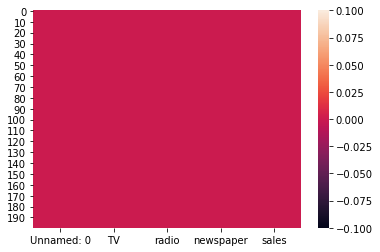

In [5]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='radio', ylabel='sales'>

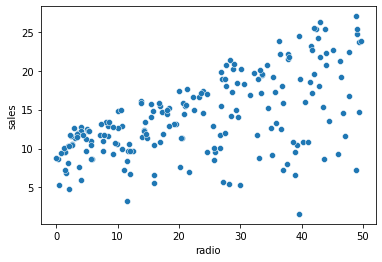

In [21]:
sns.scatterplot(x="radio", y="sales",data=df)

In [7]:
companies=len(df["radio"])
print(companies)

200


In [8]:
df_array=np.array(df)

In [9]:
print(df_array[3][2]) #3 means 4th row and 2 means 3rd column i.e., Radio

41.3


In [10]:
mean_radio_x=sum(df["radio"])/companies
mean_radio_x

23.264000000000024

In [11]:
mean_sales_y=sum(df["sales"])/companies
mean_sales_y

14.022500000000003

In [12]:
#calculation of variance of radio
v=0
i=0
for i in range(companies):
    v=v+((df_array[i][2]-mean_radio_x)**2)
    
variance_x=v/companies
print(variance_x)

219.32560399999994


In [13]:
#calculation of variance of sales
s=0
i=0
for i in range(companies):
    s=s+((df_array[i][4]-mean_sales_y)**2)
    
variance_y=s/companies
print(variance_y)

27.08574374999999


In [14]:
#calculation of co-variance between sales and radio advertisement
k=0
i=0
for i in range(companies):
    k=k+((df_array[i][2]-mean_radio_x)*(df_array[i][4]-mean_sales_y))
    
co_variance=k/companies
print(co_variance)

44.41250999999999


In [15]:
weight=co_variance/variance_x
bias=mean_sales_y-(weight*mean_radio_x)
weight,bias

(0.20249578339243968, 9.31163809515828)

In [16]:
sales=0.202495783*40+9.311638
sales

17.411469320000002

In [17]:
#Lets compare this with the sklearn
reg=LinearRegression()
reg.fit(df[["radio"]],df[["sales"]])

LinearRegression()

In [18]:
print(reg.predict([[40]]))
print("Both values are the same")

[[17.41146943]]
Both values are the same
